### Name: Sohan Rudra
### Roll No: 16MA20054

In [1]:
#library imports
import math
import time
from collections import namedtuple
from fractions import Fraction 
from copy import copy
import numpy as np
from numpy.linalg import inv
from sympy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%matplotlib notebook

In [2]:
#some boilerplate code
x = symbols('x')
y = symbols('y')
#Equation = namedtuple('Equation',('alpha'))
Conditions = namedtuple('Conditions',('dx','dy','x0','xn','y0','yn','ub','e'))

In [3]:
%%latex
\begin{align}
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0\\
u(x,y) = x^2y^2 \ boundary\\
0 \leq x,y \leq 4\\
\delta x = 1, \delta y = 1\\
\end{align}

<IPython.core.display.Latex object>

In [4]:
def initilize(cond):
    nx = int(np.ceil((cond.xn - cond.x0)/cond.dx))
    ny = int(np.ceil((cond.yn - cond.y0)/cond.dy))
    x_s = np.arange(cond.x0, cond.xn + cond.dx, cond.dx)
    y_s = np.arange(cond.y0, cond.yn + cond.dy, cond.dy)
    u = np.zeros((nx+1,ny+1))
    for i,xi in enumerate(x_s):
        for j,yj in enumerate(y_s):
            if (i == 0 or i == nx) or (j == 0 or j == ny):
                u[i][j] = cond.ub.subs([(x, xi), (y, yj)])
    return u

In [5]:
def Gauss_Sidel_Solver(cond, sols):
    nx = int(np.ceil((cond.xn - cond.x0)/cond.dx))
    ny = int(np.ceil((cond.yn - cond.y0)/cond.dy))
    u = copy(sols)
    for j in range(1,ny):
        for i in range(1,nx):
            u[j][i] = 0.5/(1.0/cond.dx**2 + 1.0/cond.dy**2)*((sols[j][i+1] +\
                        u[j][i-1])/cond.dx**2 + (sols[j+1][i] + u[j-1][i])/cond.dy**2)
            
    return u

In [14]:
def Solver(cond):
    U_solve = []
    u_i = initilize(cond)
    U_solve.append(u_i)
    u_k = Gauss_Sidel_Solver(cond, u_i)
    ep = np.max(abs(u_k - u_i))
    while ep >= cond.e:
        u_i = copy(u_k)
        U_solve.append(u_i)
        u_k = Gauss_Sidel_Solver(cond, u_i)
        ep = np.max(abs(u_k - u_i))
    U_solve.append(u_k)
    return U_solve

In [15]:
cond = Conditions(1.0,1.0,0.0,4.0,0.0,4.0,x**2*y**2,0.001)
u = Solver(cond)

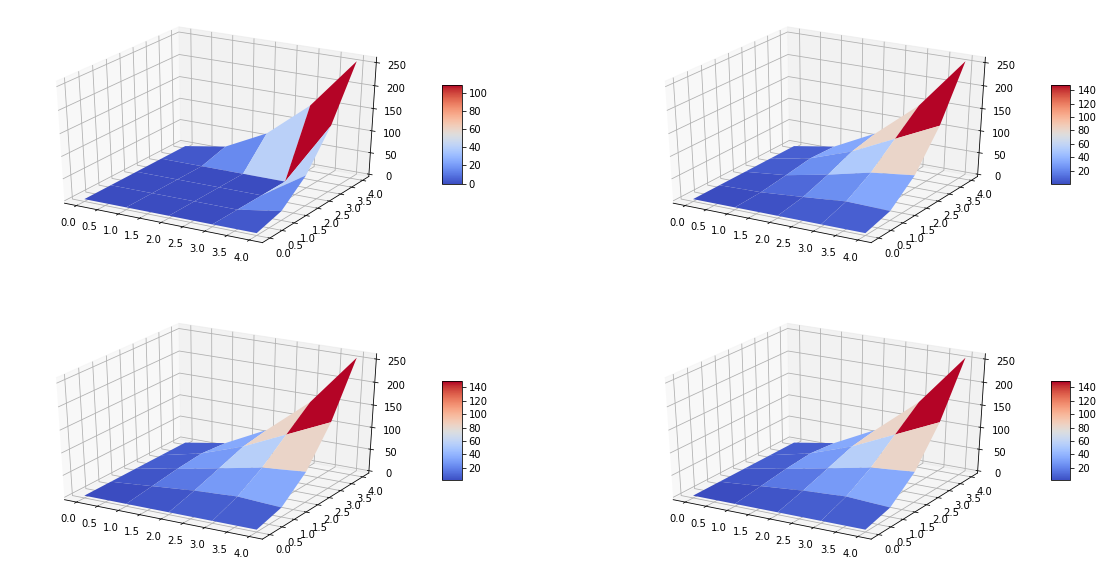

In [16]:
i = np.arange(cond.x0, cond.xn + cond.dx, cond.dx)
j = np.arange(cond.y0, cond.yn + cond.dy, cond.dy)
X, Y = np.meshgrid(i, j)
fig = plt.figure(figsize=(20,10))
fig.clear()
ax = fig.add_subplot(221, projection='3d')
surf = ax.plot_surface(X,Y,u[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.4, aspect=5)
ax = fig.add_subplot(222, projection='3d')
surf1 = ax.plot_surface(X,Y,u[4],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf1, shrink=0.4, aspect=5)
ax = fig.add_subplot(223, projection='3d')
surf1 = ax.plot_surface(X,Y,u[11],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf1, shrink=0.4, aspect=5)
ax = fig.add_subplot(224, projection='3d')
surf1 = ax.plot_surface(X,Y,u[-1],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf1, shrink=0.4, aspect=5)
plt.show()

In [17]:
cond = Conditions(.5,.5,0.0,4.0,0.0,4.0,x**2*y**2,0.001)
u = Solver(cond)
len(u)

62

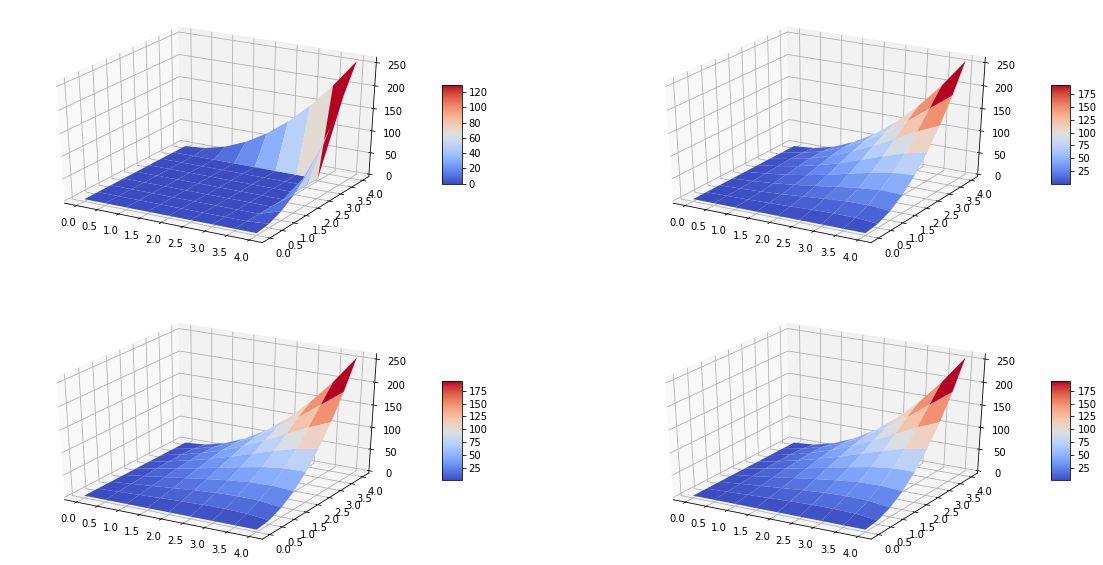

In [18]:
i = np.arange(cond.x0, cond.xn + cond.dx, cond.dx)
j = np.arange(cond.y0, cond.yn + cond.dy, cond.dy)
X, Y = np.meshgrid(i, j)
fig = plt.figure(figsize=(20,10))
fig.clear()
ax = fig.add_subplot(221, projection='3d')
surf = ax.plot_surface(X,Y,u[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.4, aspect=5)
ax = fig.add_subplot(222, projection='3d')
surf1 = ax.plot_surface(X,Y,u[15],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf1, shrink=0.4, aspect=5)
ax = fig.add_subplot(223, projection='3d')
surf1 = ax.plot_surface(X,Y,u[45],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf1, shrink=0.4, aspect=5)
ax = fig.add_subplot(224, projection='3d')
surf1 = ax.plot_surface(X,Y,u[-1],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf1, shrink=0.4, aspect=5)
plt.show()

In [19]:
cond = Conditions(.1,.1,0.0,4.0,0.0,4.0,x**2*y**2,0.001)
u = Solver(cond)
len(u)

977

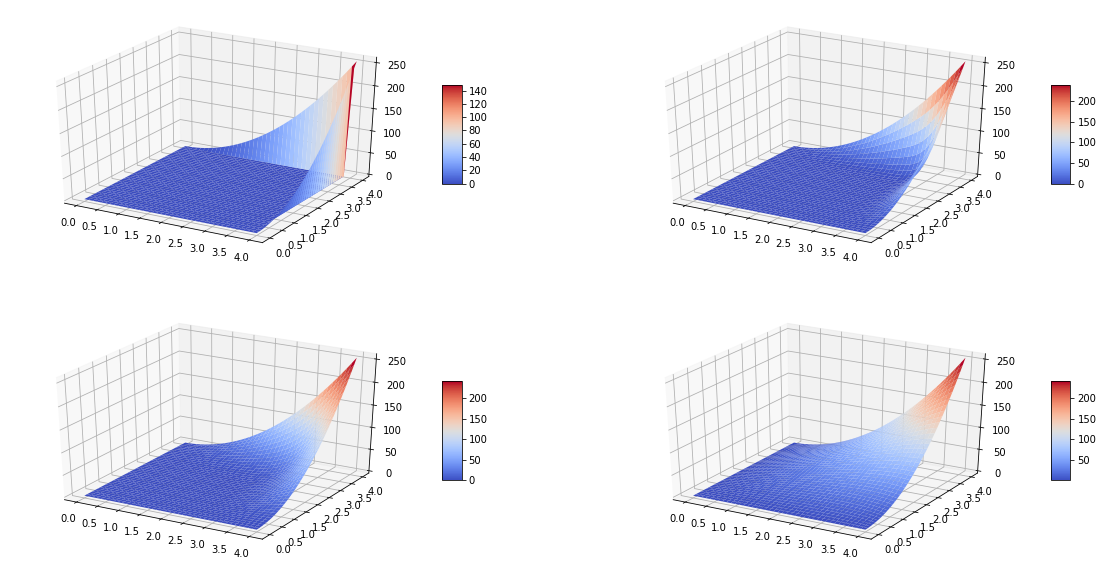

In [20]:
i = np.arange(cond.x0, cond.xn + cond.dx, cond.dx)
j = np.arange(cond.y0, cond.yn + cond.dy, cond.dy)
X, Y = np.meshgrid(i, j)
fig = plt.figure(figsize=(20,10))
fig.clear()
ax = fig.add_subplot(221, projection='3d')
surf = ax.plot_surface(X,Y,u[0],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.4, aspect=5)
ax = fig.add_subplot(222, projection='3d')
surf1 = ax.plot_surface(X,Y,u[15],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf1, shrink=0.4, aspect=5)
ax = fig.add_subplot(223, projection='3d')
surf1 = ax.plot_surface(X,Y,u[45],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf1, shrink=0.4, aspect=5)
ax = fig.add_subplot(224, projection='3d')
surf1 = ax.plot_surface(X,Y,u[-1],cmap=cm.coolwarm,linewidth=0, antialiased=True)
fig.colorbar(surf1, shrink=0.4, aspect=5)
plt.show()